<a href="https://colab.research.google.com/github/venkataramanik/Supplychain/blob/main/Project_3_%E2%80%93_Holt_Winters_Forecast_for_Seasonal_Retail_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

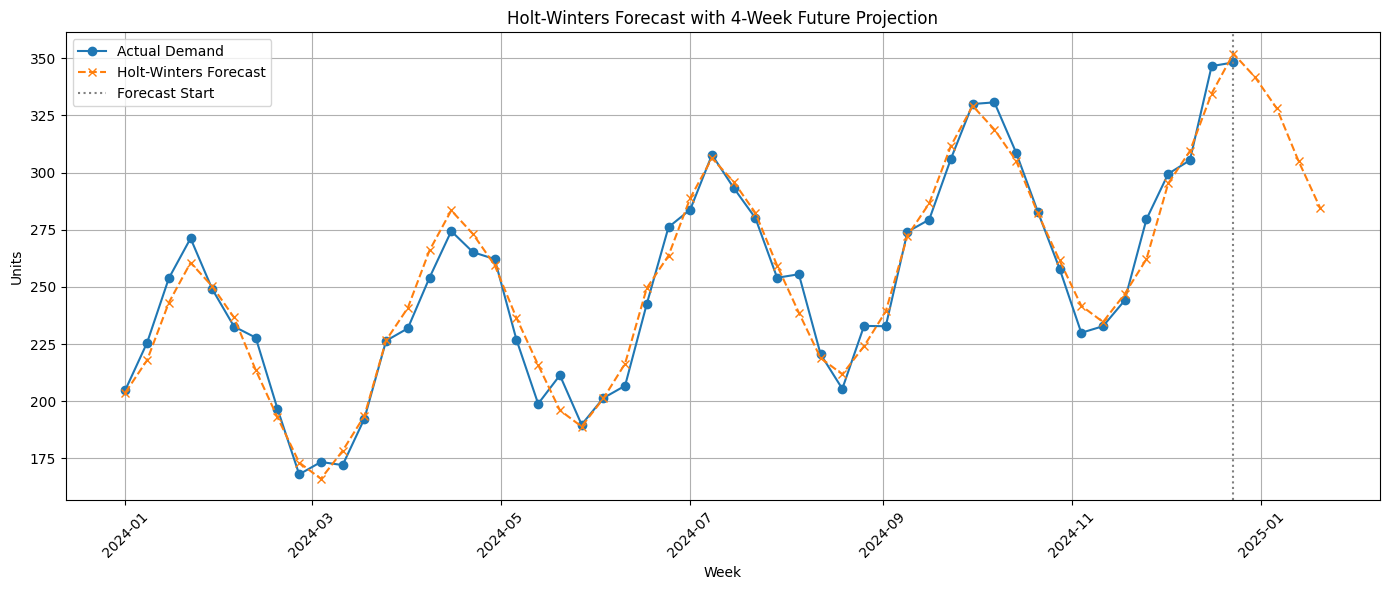

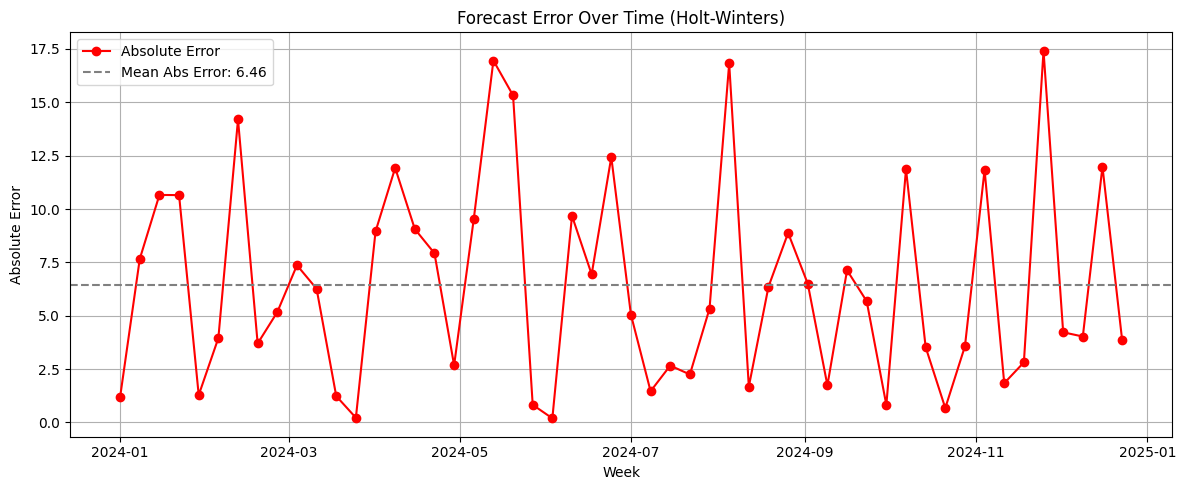

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Simulate 52 weeks of retail demand (e.g., air conditioners)
np.random.seed(42)
weeks = pd.date_range(start='2024-01-01', periods=52, freq='W-MON')
trend = np.arange(52) * 2
seasonality = 50 * np.sin(np.arange(52) * (2 * np.pi / 12))
noise = np.random.normal(0, 10, 52)
base_demand = 200
demand = base_demand + trend + seasonality + noise

# Create DataFrame
df = pd.DataFrame({'Week': weeks, 'Demand': demand})
df.set_index('Week', inplace=True)
df.index.freq = 'W-MON'

# Fit Holt-Winters model (trend + seasonality)
hw_model = ExponentialSmoothing(
    df['Demand'],
    trend='add',
    seasonal='add',
    seasonal_periods=12
).fit()

# Fitted values
df['HW_Fitted'] = hw_model.fittedvalues

# Forecast next 4 weeks
future_weeks = pd.date_range(start=df.index[-1] + pd.Timedelta(weeks=1), periods=4, freq='W-MON')
future_forecast = hw_model.forecast(steps=4)

# Create forecast DataFrame
future_df = pd.DataFrame({'Week': future_weeks, 'Demand': np.nan, 'HW_Fitted': future_forecast})
future_df.set_index('Week', inplace=True)

# Combine actual + forecast
full_df = pd.concat([df, future_df])

# Plot actual + forecast
plt.figure(figsize=(14,6))
plt.plot(full_df.index, full_df['Demand'], label='Actual Demand', marker='o')
plt.plot(full_df.index, full_df['HW_Fitted'], label='Holt-Winters Forecast', linestyle='--', marker='x')

plt.axvline(x=df.index[-1], color='gray', linestyle=':', label='Forecast Start')
plt.title('Holt-Winters Forecast with 4-Week Future Projection')
plt.ylabel('Units')
plt.xlabel('Week')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --------------------------------------------
# 📉 Forecast Error Analysis (on fitted period)
# --------------------------------------------

df_eval = df.copy()
df_eval['Error'] = df_eval['Demand'] - df_eval['HW_Fitted']
df_eval['Abs_Error'] = abs(df_eval['Error'])

# Plot forecast error
plt.figure(figsize=(12,5))
plt.plot(df_eval.index, df_eval['Abs_Error'], color='red', marker='o', label='Absolute Error')
plt.axhline(y=df_eval['Abs_Error'].mean(), color='gray', linestyle='--', label=f"Mean Abs Error: {df_eval['Abs_Error'].mean():.2f}")
plt.title("Forecast Error Over Time (Holt-Winters)")
plt.ylabel("Absolute Error")
plt.xlabel("Week")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# 📈 Project 3 – Holt-Winters Forecast for Seasonal Retail Product

## 🔧 Forecasting Technique: Holt-Winters Exponential Smoothing

Holt-Winters handles **level, trend, and seasonality** — ideal for forecasting retail products with **regular demand cycles** and **growth patterns**.

---

## 🏭 Industry Use Case

### ❄️ Seasonal Product: Air Conditioners

- **Problem**: Forecast weekly demand for AC units at distribution centers.
- **Challenge**: Demand grows leading into summer, peaks, then falls — repeating yearly.
- **Solution**: Holt-Winters captures both trend and seasonality, enabling better inventory positioning.

### 🧃 Other Use Cases:
- Forecasting sales of **cold beverages** in summer
- Planning **holiday inventory** for e-commerce
- Seasonal **agriculture tools or apparel**

---

## 📈 Results

We simulate 52 weeks of seasonal retail demand and forecast using Holt-Winters. The forecast adapts to demand growth and cyclic patterns, making it useful for proactive supply planning.
